In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

calibration_wide/GOPR0034.jpg


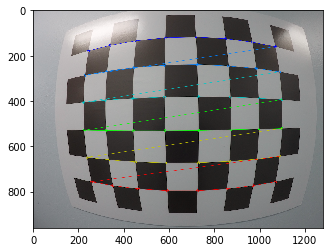

calibration_wide/GOPR0035.jpg


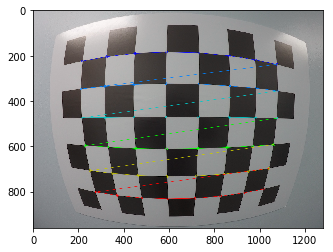

calibration_wide/GOPR0037.jpg


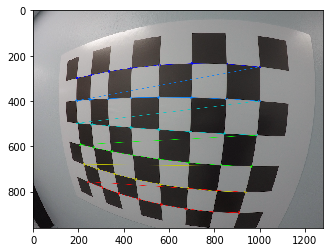

calibration_wide/GOPR0036.jpg


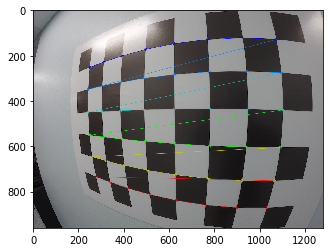

calibration_wide/GOPR0032.jpg


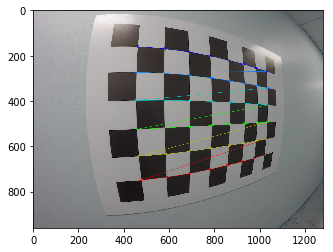

calibration_wide/GOPR0033.jpg


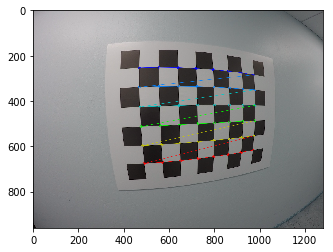

calibration_wide/GOPR0057.jpg


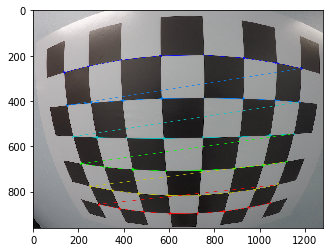

calibration_wide/GOPR0043.jpg


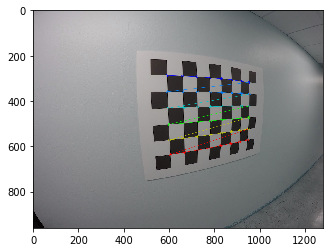

calibration_wide/GOPR0042.jpg


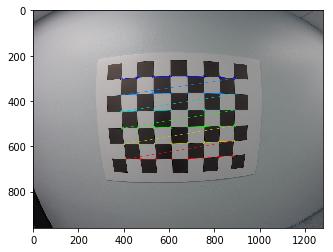

calibration_wide/GOPR0068.jpg


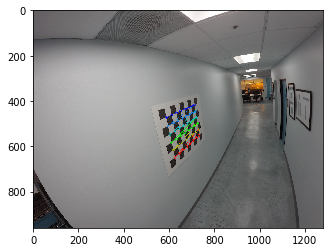

calibration_wide/GOPR0040.jpg


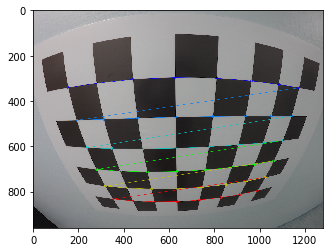

calibration_wide/GOPR0054.jpg


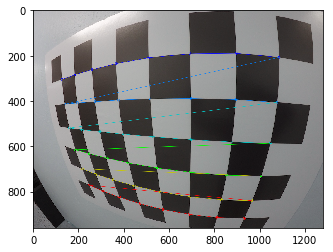

calibration_wide/GOPR0055.jpg
calibration_wide/GOPR0041.jpg


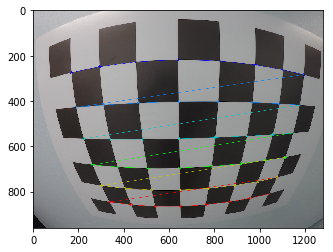

calibration_wide/GOPR0069.jpg


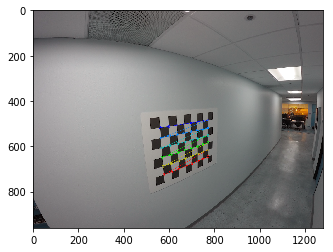

calibration_wide/GOPR0045.jpg


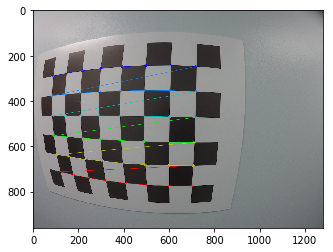

calibration_wide/GOPR0051.jpg


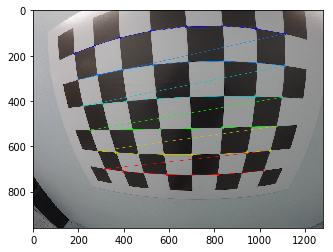

calibration_wide/GOPR0050.jpg


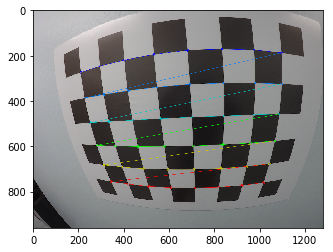

calibration_wide/GOPR0044.jpg


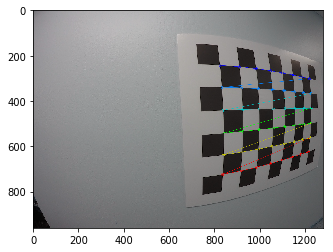

calibration_wide/GOPR0052.jpg


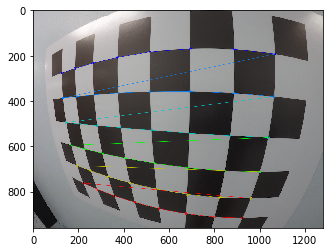

calibration_wide/GOPR0046.jpg


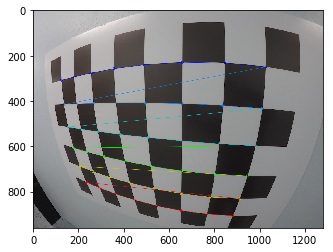

calibration_wide/GOPR0047.jpg


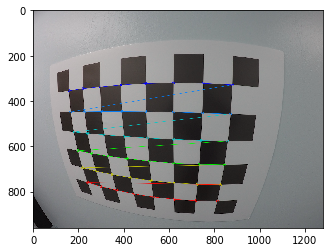

calibration_wide/GOPR0053.jpg


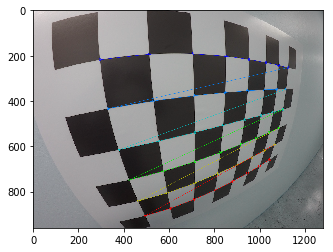

calibration_wide/GOPR0062.jpg


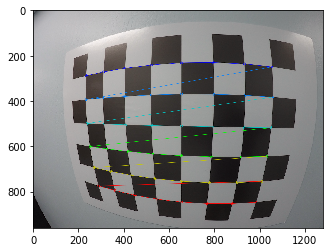

calibration_wide/GOPR0063.jpg


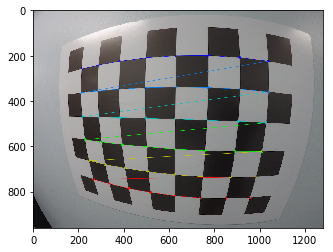

calibration_wide/GOPR0049.jpg


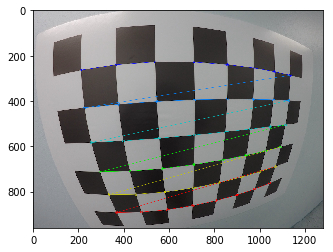

calibration_wide/GOPR0061.jpg


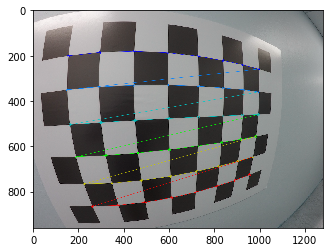

calibration_wide/GOPR0060.jpg


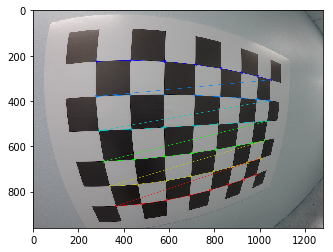

calibration_wide/GOPR0048.jpg


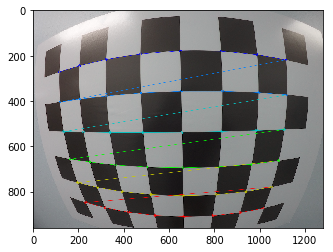

calibration_wide/GOPR0064.jpg


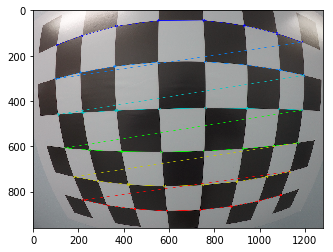

calibration_wide/GOPR0070.jpg


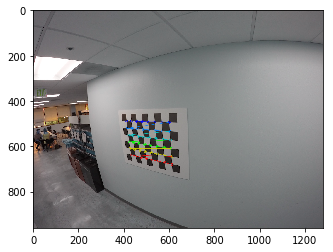

calibration_wide/GOPR0058.jpg


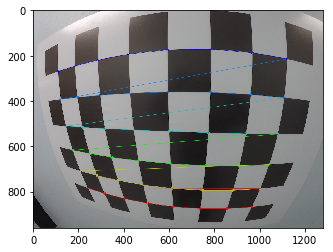

calibration_wide/GOPR0059.jpg


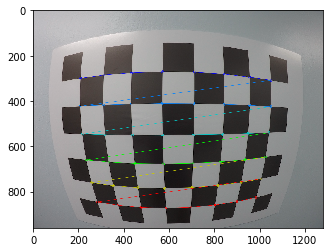

calibration_wide/GOPR0067.jpg


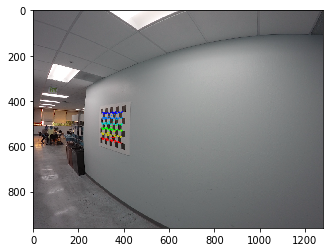

calibration_wide/GOPR0066.jpg


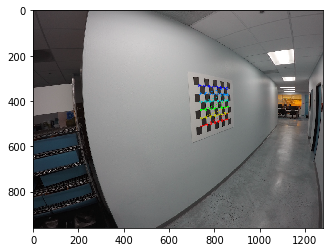

calibration_wide/GOPR0038.jpg


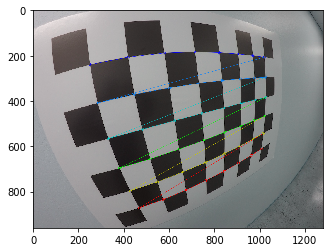

In [4]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32) # the z-coordinate is set at zero
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2) # List of pairs coordinates (x, y on the chessboard)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    print(fname)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        plt.figure()
        plt.imshow(img)
        plt.show()


### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

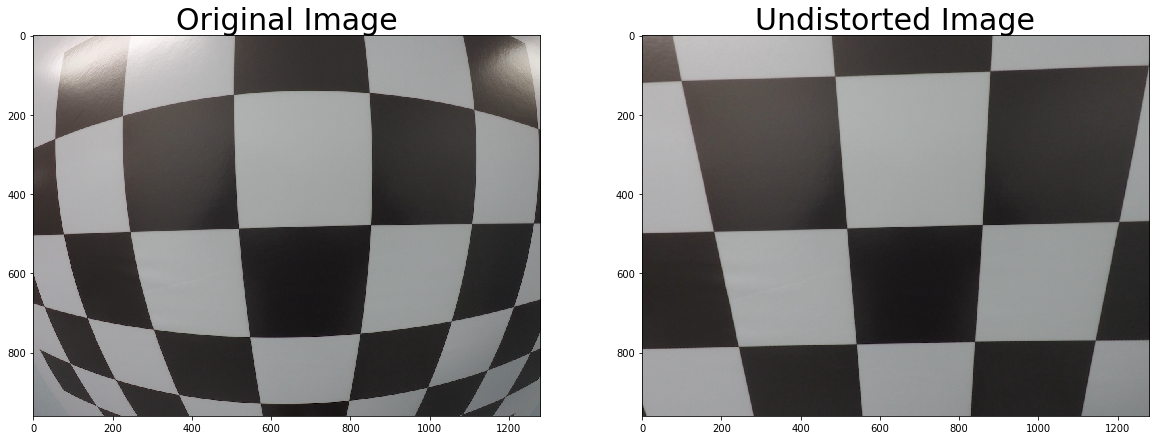

In [5]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Perspective Transform

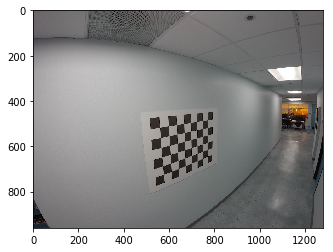

In [3]:
fname = "calibration_wide/GOPR0069.jpg"
img = cv2.imread(fname)
plt.figure()
plt.imshow(img)
plt.show()

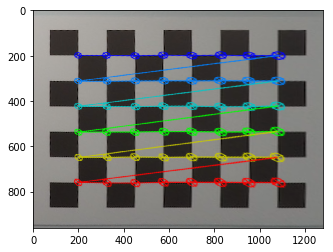

In [6]:
def perspective_transform(img, mtx, dist):
    y, x, _ = img.shape
    # Get undistort image   
    undistort = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Get image points. Detect from the chessboard
    retCB, corners = cv2.findChessboardCorners(cv2.cvtColor(undistort, cv2.COLOR_BGR2GRAY), (8,6), None)
    if retCB:
        cv2.drawChessboardCorners(undistort, (8,6), corners, retCB)

    # From the corners, get the 4 corners from image board. Top left, top right, bottom right, bottom left.
    src = np.float32([corners[0], corners[8-1], corners[-1], corners[-8]])
    # Get the destination coordinates
    offset = 200
    dst = np.float32([[offset, offset], [x-offset, offset], [x-offset, y-offset], [offset, y-offset]])
    
    # Get the transformation matrix
    M = cv2.getPerspectiveTransform(src, dst)
    transformed = cv2.warpPerspective(undistort, M, (x,y))
    return transformed

dst_img = perspective_transform(img, mtx, dist)
plt.figure()
plt.imshow(dst_img)
plt.show()

## Sobel

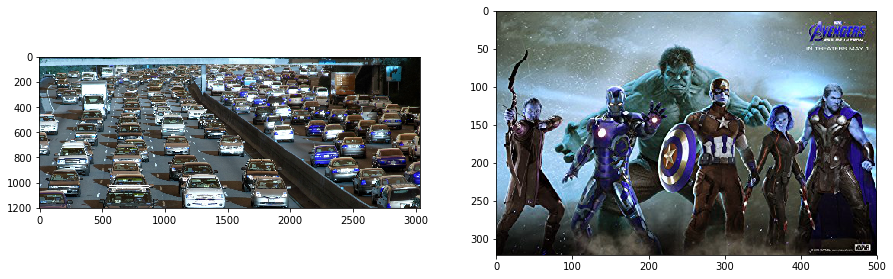

In [23]:
avengers = cv2.imread('avengers.jpg')
traffic = cv2.imread('traffic.jpg')
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(traffic)
plt.subplot(1,2,2)
plt.imshow(avengers)
plt.show()

<a href=http://www.meccanismocomplesso.org/en/opencv-python-image-edge-gradient-analysis/>Image Gradient</a>

<img src="Screen%20Shot%202018-03-16%20at%205.46.23%20PM.png",width=500,height=500>

<img src="Screen%20Shot%202018-03-16%20at%205.46.34%20PM.png",width=500,height=500>

The gradients reported in the gray scale with **cv2.CV_64F** values are represented by positive values (positive slope) when changing from black to white. While they are represented by negative values (negative slope) when switching from white to black. **In the conversion from cv2.CV_64F to cv2.CV_8U, all negative slopes are reduced to 0, and then the information relating to those edges are lost**. When the program will display the image, the edges from white to black will not be represented.

To overcome this, you should keep the data in the output of the filter in cv2.CV_64F (instead cv2.CV_8U), then calculate the absolute value, and finally do the conversion in cv2.CV_8U.

In [32]:
def sobel(img, x_direction=True, thresh_min=20, thresh_max=100):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if x_direction:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # x-direction
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1) # y-direction
    scaled_sobel = np.uint8(255*np.abs(sobel)/np.max(np.abs(sobel)))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxbinary

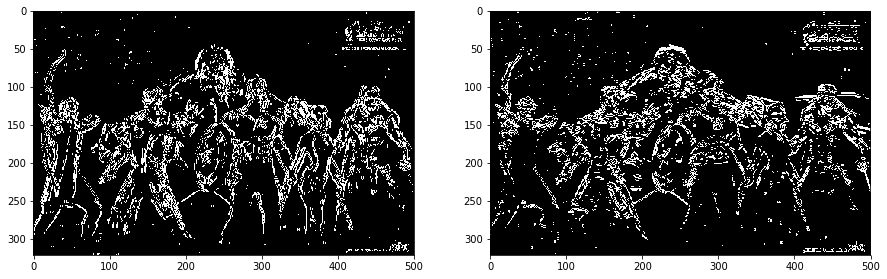

In [34]:
avengers_x = sobel(avengers, x_direction=True, thresh_min=30, thresh_max=100)
avengers_y = sobel(avengers, x_direction=False, thresh_min=30, thresh_max=100)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(avengers_x, cmap='gray')
plt.subplot(122)
plt.imshow(avengers_y, cmap='gray')

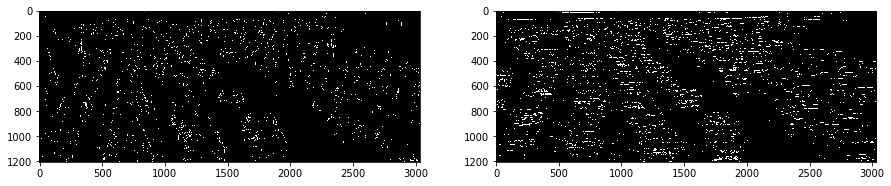

In [31]:
traffic_x = sobel(traffic, x_direction=True, thresh_min=50, thresh_max=100)
traffic_y = sobel(traffic, x_direction=False, thresh_min=50, thresh_max=100)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(traffic_x, cmap='gray')
plt.subplot(122)
plt.imshow(traffic_y, cmap='gray')

## Combine multiple aspects of gradients

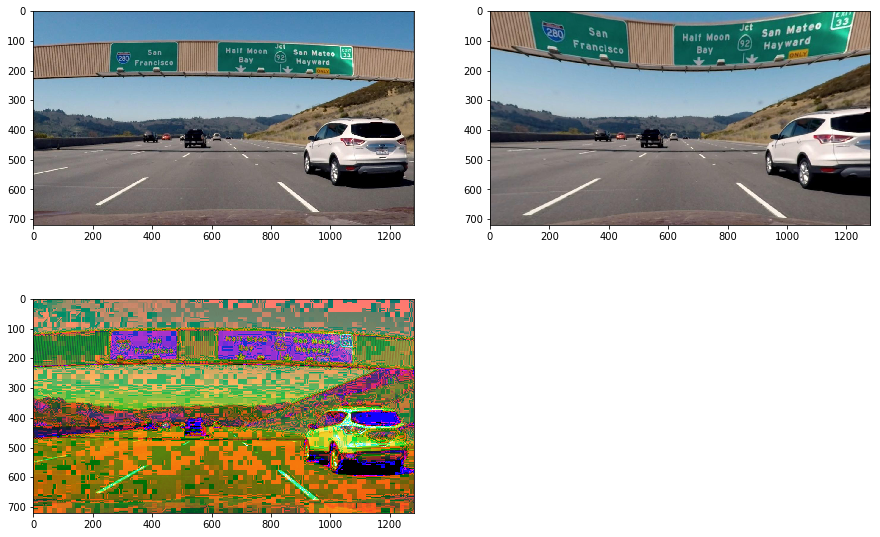

In [6]:
import matplotlib.image as mpimg
lanes = mpimg.imread('signs_vehicles_xygrad.png') # RGB
undistort_lanes = cv2.undistort(lanes, mtx, dist, None, mtx)
lanes_HLS = cv2.cvtColor(lanes, cv2.COLOR_RGB2HLS) # HLS
plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.imshow(lanes)
plt.subplot(322)
plt.imshow(undistort_lanes)
plt.subplot(323)
plt.imshow(lanes_HLS, cmap='gray')

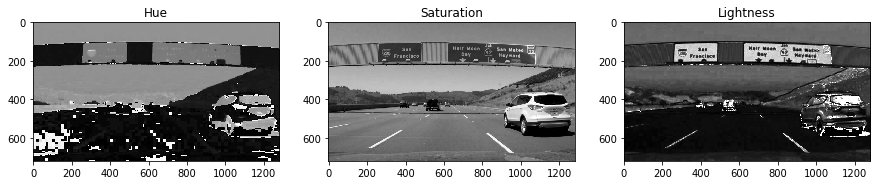

In [7]:
H = lanes_HLS[:, :, 0]
L = lanes_HLS[:, :, 1]
S = lanes_HLS[:, :, 2]
def display(layers):
    plt.figure(figsize=(15, 15))
    plt.subplot(131, title="Hue")
    plt.imshow(layers[0], cmap='gray')
    plt.subplot(132, title="Saturation")
    plt.imshow(layers[1], cmap='gray')
    plt.subplot(133, title="Lightness")
    plt.imshow(layers[2], cmap='gray')
display((H, L, S))

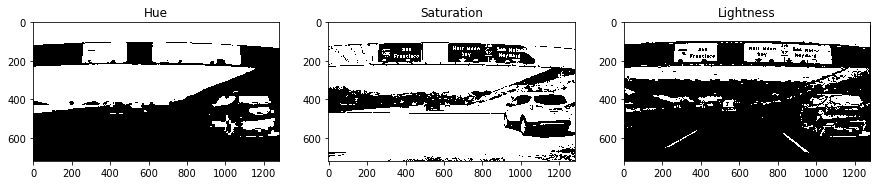

In [8]:
# Filter yellow 
def filter_color(color, layer):
    binary_output = np.zeros_like(layer)
    binary_output[(layer > color[0]) & (layer <= color[1])] = 1
    return binary_output

yellow = (90, 255)
out = []
for layer in [H, L*255, S*255]:
    res = filter_color(yellow, layer)
    out.append(res)
display(out)

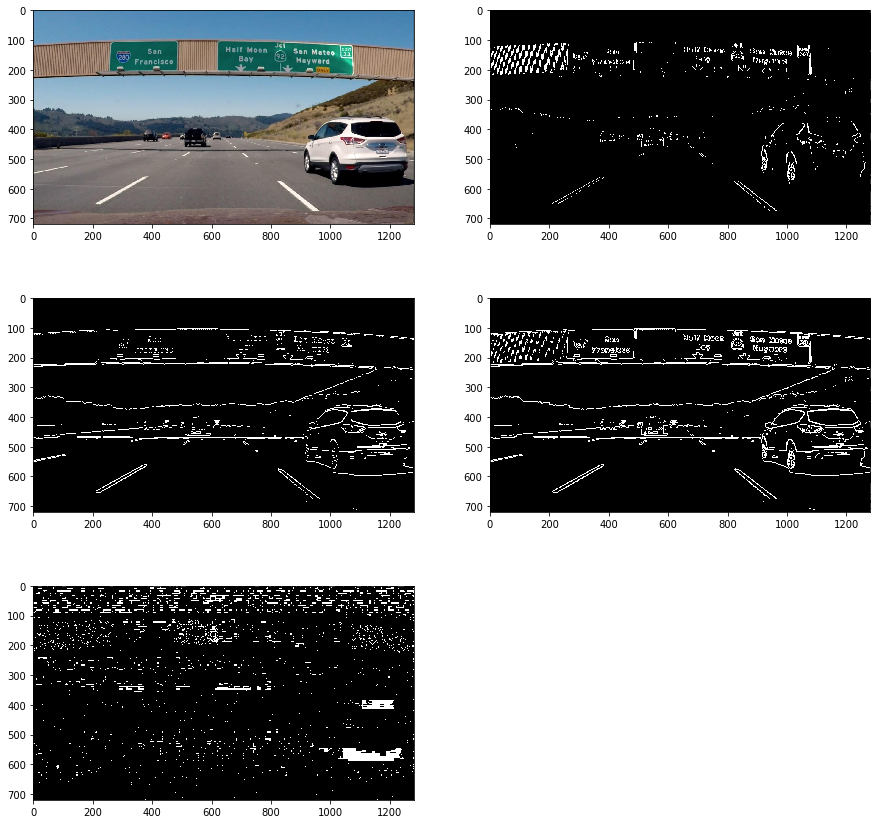

In [29]:
def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    scaled_sobel = np.uint8(255*np.abs(sobel)/np.max(np.abs(sobel)))
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    mag = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*mag/np.max(mag))
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    direction = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    scaled_sobel = np.uint8(255*direction/np.max(direction))
    dir_binary = np.zeros_like(scaled_sobel)
    dir_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return dir_binary

# Choose a Sobel kernel size
ksize = 5 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(lanes, orient='x', sobel_kernel=ksize, thresh=(50, 255))
grady = abs_sobel_thresh(lanes, orient='y', sobel_kernel=ksize, thresh=(50, 255))
mag_binary = mag_thresh(lanes, sobel_kernel=ksize, mag_thresh=(50, 255))
dir_binary = dir_threshold(lanes, sobel_kernel=ksize, thresh=(0, np.pi/2))

plt.figure(figsize=(15,15))
plt.subplot(321)
plt.imshow(lanes, cmap='gray')
plt.subplot(322)
plt.imshow(gradx, cmap='gray')
plt.subplot(323)
plt.imshow(grady, cmap='gray')
plt.subplot(324)
plt.imshow(mag_binary, cmap='gray')
plt.subplot(325)
plt.imshow(dir_binary, cmap='gray')

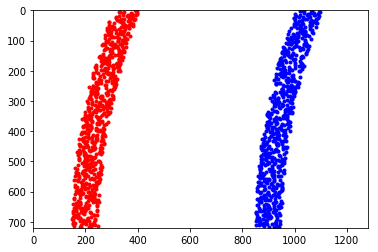

In [30]:
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.gca().invert_yaxis()

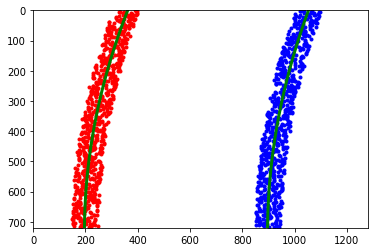

In [32]:
# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images